In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors, svm
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
import seaborn as sns

### Boundaries plot

In [4]:
def plot_mesh_grid(title, step_size, x_train, clf, x, y):
    # Create min and max values for my grid coordinates:
    x_min, x_max = x_train[:, 0].min() - 1, x_train[:, 0].max() + 1
    y_min, y_max = x_train[:, 1].min() - 1, x_train[:, 1].max() + 1
    # creates coordinate matrices from x and y range vectors
    xx, yy = np.meshgrid(np.arange(x_min, x_max, step_size), np.arange(y_min, y_max, step_size))
    # Create a feature array for each point of the grid
    grid_feature_values = np.c_[xx.ravel(), yy.ravel()]
    # Predict the class for each array of the grid
    Z = clf.predict(grid_feature_values)
    # Bring back the array to the original shape
    Z = Z.reshape(xx.shape)
    fig = plt.figure(frameon=False)
    fig.suptitle(title)
    plt.pcolormesh(xx, yy, Z)
    plt.scatter(x[:, 0], x[:, 1], c=y, edgecolor='k', s=20)
    plt.show()

### Accuracy plot

In [5]:
def plot_acc(title, x_values, acc_vector, log_scale=False):
    sns.lineplot(x_values, acc_vector)
    plt.grid(True)
    #plt.plot(x_values, acc_vector, 'g', label='Training loss')
    if log_scale:
        plt.xscale("log")
    plt.title('Accuracy on the validation set')
    plt.xlabel(title)
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

### Loading data

In [6]:
K = [1, 3, 5, 7]
C = np.logspace(-3, 3, 7)
GAMMA = np.logspace(-5, 4, 10)
RANDOM_SEED = 42

# 1)
wine_data = load_wine()

# 2)
X = wine_data.data[:, 0:2]
y = wine_data.target
# Normalize the features for the SVM:
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# 3)
X_train, X_test_val, y_train, y_test_val = train_test_split(X, y, test_size=0.5, random_state=RANDOM_SEED)
X_validation, X_test, y_validation, y_test = train_test_split(X_test_val, y_test_val, test_size=3/5, random_state=RANDOM_SEED)


## KNN


Training classifier with 1 nearest neighbors...


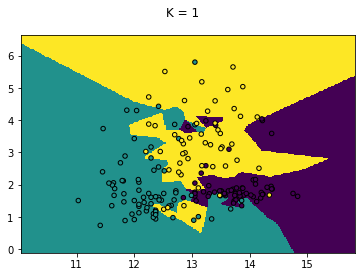

Accuracy: 0.771

Training classifier with 3 nearest neighbors...


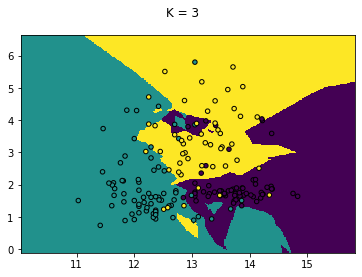

Accuracy: 0.857

Training classifier with 5 nearest neighbors...


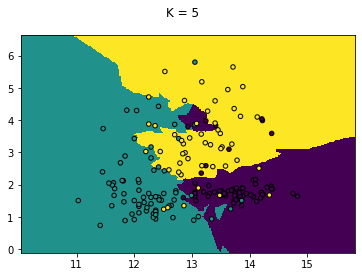

Accuracy: 0.857

Training classifier with 7 nearest neighbors...


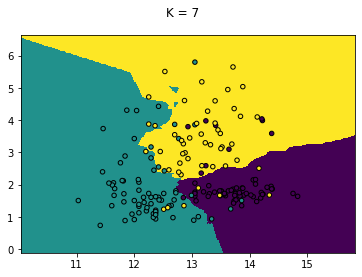

No handles with labels found to put in legend.


Accuracy: 0.829


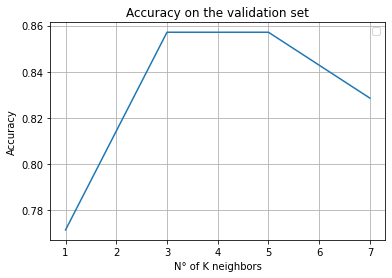


The best accuracy on the validation set was found with K = 3
Accuracy on the test set: 0.833


In [7]:
# 4)
knn_acc = []
knn_models = []

for k in K:
    clf = neighbors.KNeighborsClassifier(n_neighbors=k)
    print("\nTraining classifier with " + str(k) + " nearest neighbors...")
    clf.fit(X_train, y_train)

    # 4.b)
    plot_mesh_grid(title="K = " + str(k),  # plot the decision boundaries with a mesh grid
                   step_size=0.02, x_train=X_train, clf=clf, x=X, y=y)

    # 4.c)
    # Evaluate the method on the validation set
    validation_predictions = clf.predict(X_validation)
    accuracy = accuracy_score(y_validation, validation_predictions)

    # Append accuracy and trained model to lists
    knn_acc.append(accuracy)
    knn_models.append(clf)

    print("Accuracy: {:.3}".format(accuracy))

# 5)
# Plot the accuracy for the different values of K
plot_acc(title="N° of K neighbors", x_values=K, acc_vector=knn_acc)


# 7)
# Find the index of the best performing model on the validation set
best_acc = np.argmax(knn_acc)
print("\nThe best accuracy on the validation set was found with K = {}".format(K[best_acc]))

# Evaluate the best performing model on the test set
test_predictions = knn_models[best_acc].predict(X_test)
accuracy = accuracy_score(test_predictions, y_test)

print("Accuracy on the test set: {:.3}".format(accuracy))

# The model seems to be working fine with the test set, it can be considered a good accuracy,
# taking also into account the fact that we are training only on 2 features of the dataset

# Compute the splits again, this time with the normalized features:
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.5, random_state=RANDOM_SEED)
X_validation, X_test, y_validation, y_test = train_test_split(X_test, y_test, test_size=3 / 5, random_state=RANDOM_SEED)


## Linear SVM


Training classifier with c = 0.001


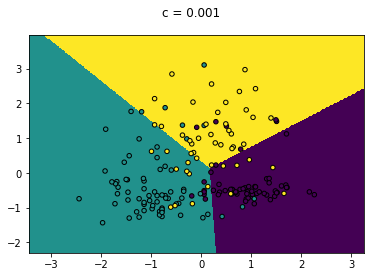

Accuracy: 0.8

Training classifier with c = 0.01


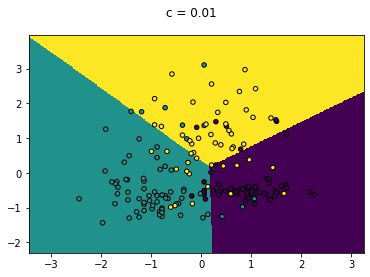

Accuracy: 0.8

Training classifier with c = 0.1


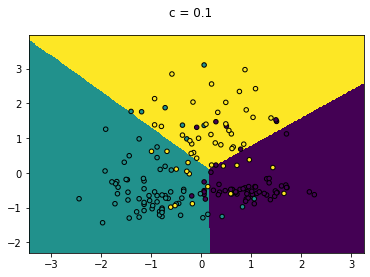

Accuracy: 0.8285714285714286

Training classifier with c = 1.0


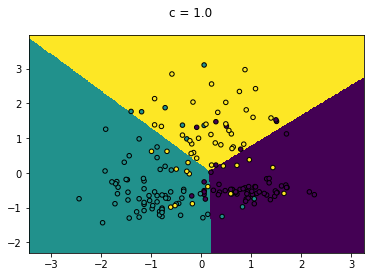

Accuracy: 0.8285714285714286

Training classifier with c = 10.0


/home/paolo/.local/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


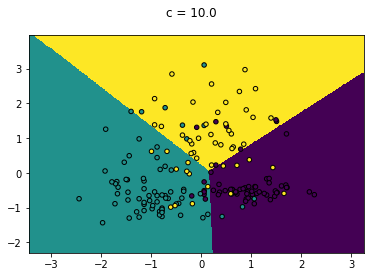

Accuracy: 0.8285714285714286

Training classifier with c = 100.0


/home/paolo/.local/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


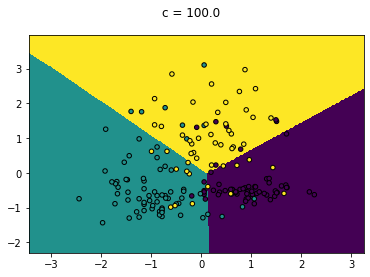

Accuracy: 0.8285714285714286

Training classifier with c = 1000.0


/home/paolo/.local/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


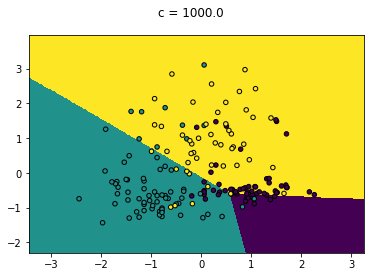

No handles with labels found to put in legend.


Accuracy: 0.6


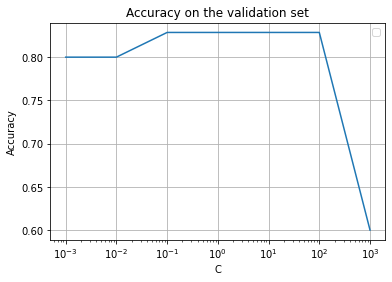


The best accuracy on the validation set was found with C = 0.1
Accuracy on the test set: 0.759


In [8]:
# 8)
linear_svm_models = []
linear_svm_acc = []
for c in C:
    clf = LinearSVC(random_state=RANDOM_SEED, C=c)
    print("\nTraining classifier with c = {}".format(c))
    clf.fit(X_train, y_train)
    plot_mesh_grid(title="c = " + str(c),  # plot the decision boundaries with a mesh grid
                   step_size=0.02, x_train=X_train, clf=clf, x=X_normalized, y=y)
    val_pred = clf.predict(X_validation)
    accuracy = accuracy_score(y_validation, val_pred)
    linear_svm_models.append(clf)
    linear_svm_acc.append(accuracy)
    print("Accuracy: " + str(accuracy))

# 9)
plot_acc(title="C", x_values=C, acc_vector=linear_svm_acc, log_scale=True)

# 11)
# Find the index of the best performing model on the validation set
best_acc = np.argmax(linear_svm_acc)
print("\nThe best accuracy on the validation set was found with C = {}".format(C[best_acc]))

# Evaluate the best performing model on the test set
test_predictions = linear_svm_models[best_acc].predict(X_test)
accuracy = accuracy_score(test_predictions, y_test)

print("Accuracy on the test set: {:.3}".format(accuracy))

## RBF kernel


Training RBF SVM with C = 0.001


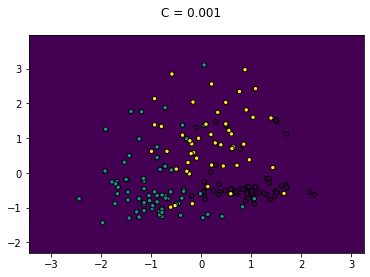

Accuracy: 0.34285714285714286

Training RBF SVM with C = 0.01


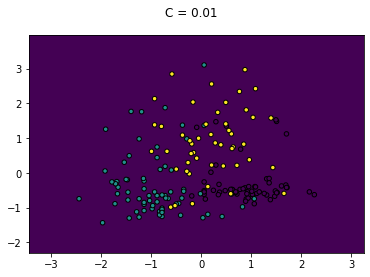

Accuracy: 0.34285714285714286

Training RBF SVM with C = 0.1


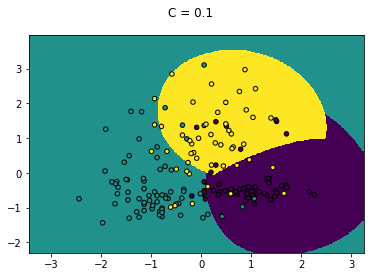

Accuracy: 0.8285714285714286

Training RBF SVM with C = 1.0


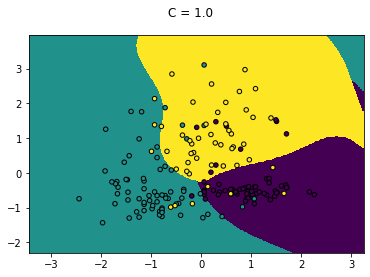

Accuracy: 0.8857142857142857

Training RBF SVM with C = 10.0


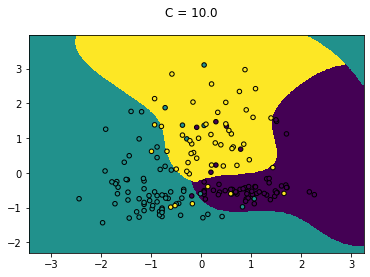

Accuracy: 0.9142857142857143

Training RBF SVM with C = 100.0


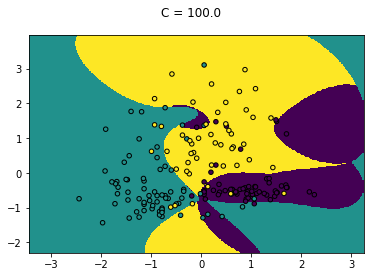

Accuracy: 0.8

Training RBF SVM with C = 1000.0


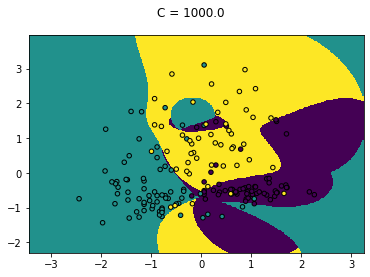

Accuracy: 0.8
0.9142857142857143
10.0

The best accuracy on the validation set was found to be 0.914 with C = 10.0
Accuracy on the test set: 0.815



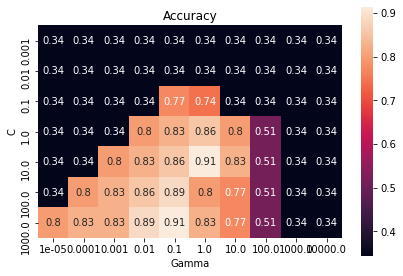


The best accuracy on the validation set was found to be 0.914 with C = 10.0 and gamma = 1.0.
Accuracy on the test set: 0.815


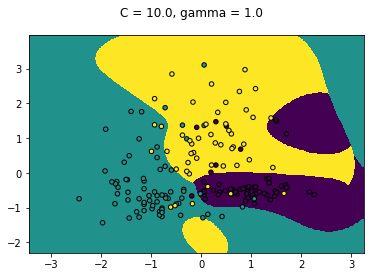

In [9]:
# 12)
rbf_models = []
rbf_acc = []
for c in C:
    clf = svm.SVC(kernel="rbf", random_state=RANDOM_SEED, C=c)
    print("\nTraining RBF SVM with C = {}".format(c))
    clf.fit(X_train, y_train)
    plot_mesh_grid(title="C = " + str(c),  # plot the decision boundaries with a mesh grid
                   step_size=0.02, x_train=X_train, clf=clf, x=X_normalized, y=y)
    val_pred = clf.predict(X_validation)
    accuracy = accuracy_score(y_validation, val_pred)
    rbf_models.append(clf)
    rbf_acc.append(accuracy)
    print("Accuracy: " + str(accuracy))

# 13)
# Find the index of the best performing model on the validation set
best_acc = np.argmax(rbf_acc)
print(rbf_acc[best_acc])
print(C[best_acc])
print("\nThe best accuracy on the validation set was found to be {:.3} with C = {}".format(float(rbf_acc[best_acc]), C[best_acc]))

# Evaluate the best performing model on the test set
test_predictions = rbf_models[best_acc].predict(X_test)
accuracy = accuracy_score(test_predictions, y_test)
print("Accuracy on the test set: {:.3}\n".format(accuracy))

# 15)
models = []
acc_vector = []

# Iterate over C and GAMMA vectors
for c in C:
    for gamma in GAMMA:
        clf = svm.SVC(kernel="rbf", random_state=RANDOM_SEED, C=c, gamma=gamma)
        clf.fit(X_train, y_train)
        models.append({"classifier": clf, "c": c, "gamma": gamma})
        validation_predictions = clf.predict(X_validation)
        accuracy = accuracy_score(y_validation, validation_predictions)
        acc_vector.append(accuracy)
        # print("C = " + str(c) + " , gamma = " + str(gamma) + ". Accuracy: " + str(accuracy))

results = np.reshape(acc_vector, (len(C), len(GAMMA)))
ax = sns.heatmap(results, annot=True, square=True)
ax.set_yticklabels(C)
ax.set_xticklabels(GAMMA)
ax.set_xlabel("Gamma")
ax.set_ylabel("C")
ax.set_title("Accuracy")
plt.tight_layout()
plt.show()
best_model = models[np.argmax(acc_vector)]
res = best_model["classifier"].predict(X_test)

best_acc = accuracy_score(res, y_test)
print("\nThe best accuracy on the validation set was found to be {:.3} "
      "with C = {} and gamma = {}.\nAccuracy on the test set: {:.3}".format(
       acc_vector[np.argmax(acc_vector)], best_model["c"], best_model["gamma"], best_acc))

# plot the decision boundaries for the best model of the grid search
plot_mesh_grid(title="C = {}, gamma = {}".format(best_model["c"], best_model["gamma"]),
               step_size=0.02, x_train=X_train, clf=best_model["classifier"], x=X_normalized, y=y)

## RBF with k-fold

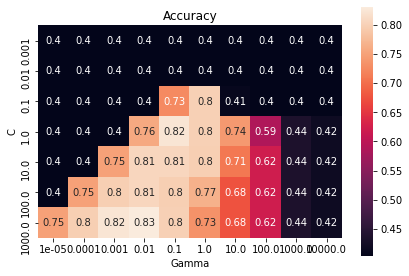

Best parameters:
{'C': 1000.0, 'gamma': 0.01}
accuracy with best model: 0.778 


In [10]:
parameters = {'C': C, 'gamma': GAMMA}

X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, shuffle=True, test_size=0.3, random_state=RANDOM_SEED)

# We use GridsearchCV to perform 5-fold cross validation
clf = GridSearchCV(svm.SVC(kernel="rbf", random_state=RANDOM_SEED), parameters, cv=5)
clf.fit(X_train, y_train)

# Shape the scores in order to plot them
results = np.reshape(clf.cv_results_["mean_test_score"], (len(C), len(GAMMA)))
ax = sns.heatmap(results, annot=True, square=True)
ax.set_yticklabels(C)
ax.set_xticklabels(GAMMA)
ax.set_xlabel("Gamma")
ax.set_ylabel("C")
ax.set_title("Accuracy")
plt.tight_layout()
plt.show()

print("Best parameters:\n" + str(clf.best_params_))

res = clf.best_estimator_.predict(X_test)
acc = accuracy_score(res, y_test)
print("accuracy with best model: {:.3} ".format(acc))